In [20]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split
import nltk
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import naive_bayes
from sklearn.metrics import roc_auc_score
from wordcloud import WordCloud
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.tree import DecisionTreeClassifier
import xgboost
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [21]:

#"C:/Users/adity/Downloads/project_2/train.csv'

In [22]:
df=pd.read_csv("train.csv")

In [23]:
df.head()

,Labels,Text,Text_Tag
0,1,Says the Annies List political group supports ...,abortion
1,2,When did the decline of coal start? It started...,"energy,history,job-accomplishments"
2,3,"Hillary Clinton agrees with John McCain ""by vo...",foreign-policy
3,1,Health care reform legislation is likely to ma...,health-care
4,2,The economic turnaround started at the end of ...,"economy,jobs"


In [24]:
df.shape

(10240, 3)

### meaning of the label
* Half-True - 2
* False - 1
* Mostly-True - 3
* True - 5
* Barely-True - 0
* Not-Known - 4

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10240 entries, 0 to 10239
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Labels    10240 non-null  int64 
 1   Text      10240 non-null  object
 2   Text_Tag  10238 non-null  object
dtypes: int64(1), object(2)
memory usage: 240.1+ KB


In [26]:
df.describe()

,Labels
count,10240.000000
mean,2.328613
std,1.650933
min,0.000000
25%,1.000000
50%,2.000000
75%,3.000000
max,5.000000


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


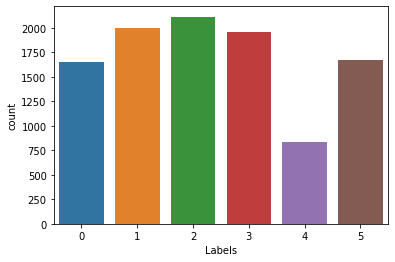

In [27]:
sns.countplot(df['Labels'])

### so here we can consider this data set as a balanced data set

In [28]:
df.head()

,Labels,Text,Text_Tag
0,1,Says the Annies List political group supports ...,abortion
1,2,When did the decline of coal start? It started...,"energy,history,job-accomplishments"
2,3,"Hillary Clinton agrees with John McCain ""by vo...",foreign-policy
3,1,Health care reform legislation is likely to ma...,health-care
4,2,The economic turnaround started at the end of ...,"economy,jobs"


In [29]:
train_qs = pd.Series(df['Text'].tolist()).astype(str)

(-0.5, 1299.5, 949.5, -0.5)

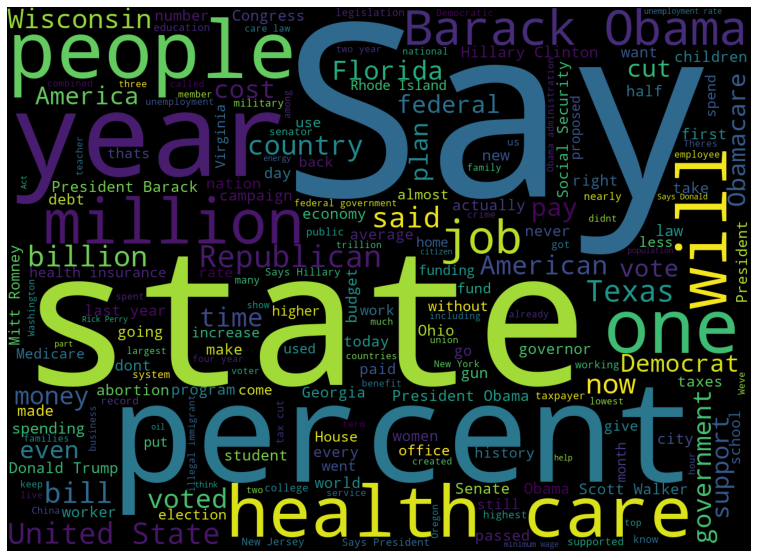

In [30]:
##word cloud for the text
cloud = WordCloud(width=1300, height=950).generate(" ".join(train_qs.astype(str)))
plt.figure(figsize=(15, 10))
plt.imshow(cloud)
plt.axis('off')

In [31]:
train_q = pd.Series(df['Text_Tag'].tolist()).astype(str)

(-0.5, 1299.5, 949.5, -0.5)

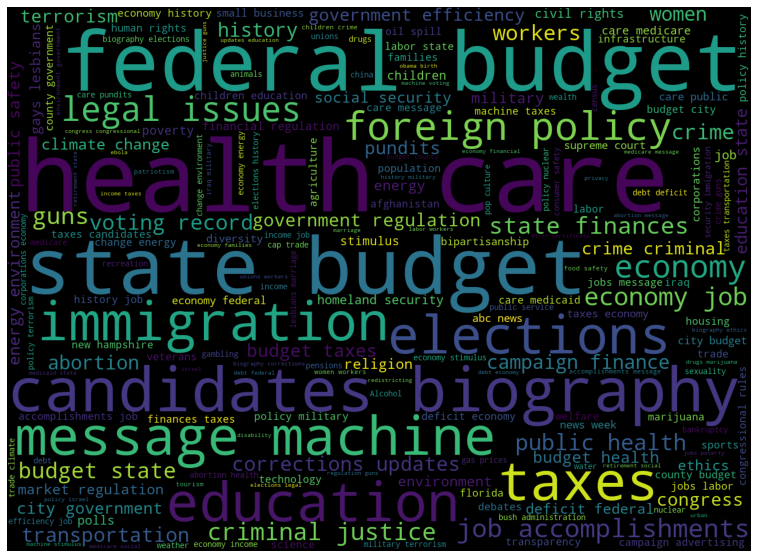

In [32]:
## word cloud for text_tag
cloud = WordCloud(width=1300, height=950).generate(" ".join(train_q.astype(str)))
plt.figure(figsize=(15, 10))
plt.imshow(cloud)
plt.axis('off')

In [33]:
stopset=set(stopwords.words('english'))
vector=TfidfVectorizer(use_idf=True,lowercase=True,strip_accents='ascii',stop_words=stopset)

In [34]:
vector.fit(df)

TfidfVectorizer(stop_words={'a', 'about', 'above', 'after', 'again', 'against',
                            'ain', 'all', 'am', 'an', 'and', 'any', 'are',
                            'aren', "aren't", 'as', 'at', 'be', 'because',
                            'been', 'before', 'being', 'below', 'between',
                            'both', 'but', 'by', 'can', 'couldn', "couldn't", ...},
                strip_accents='ascii')

In [35]:
y=df.Labels
x=vector.fit_transform(df.Text)


In [36]:
print(x.shape)
print(y.shape)

(10240, 12061)
(10240,)


In [37]:
print(x)

  (0, 3252)	0.34383539825672055
  (0, 615)	0.291994452646968
  (0, 11186)	0.4135724297617053
  (0, 10931)	0.2779535206879464
  (0, 10614)	0.27033286247495936
  (0, 5075)	0.29519135963079446
  (0, 8289)	0.28805538635305655
  (0, 6575)	0.32547970735785825
  (0, 1035)	0.43192812066056746
  (0, 9587)	0.11190845341839402
  (1, 749)	0.2059771366125641
  (1, 1942)	0.2960878588752092
  (1, 4870)	0.22844050117590908
  (1, 8467)	0.15521864047896095
  (1, 1514)	0.30750358190632776
  (1, 11028)	0.20727829358907138
  (1, 4820)	0.22981688420803537
  (1, 7348)	0.28529705793190546
  (1, 10332)	0.5155835539220387
  (1, 10331)	0.2738813349007869
  (1, 2450)	0.28168714016819435
  (1, 3159)	0.3189193049374463
  (2, 5941)	0.2841866853225673
  (2, 3651)	0.39701071509484137
  (2, 1549)	0.3309512771395015
  :	:
  (10237, 7182)	0.1624731603531382
  (10237, 10097)	0.36394750688615934
  (10237, 9725)	0.3453362002774513
  (10237, 10871)	0.14867885075009182
  (10237, 9587)	0.08522324489882203
  (10238, 6533)	0.444

In [38]:
## we can get the feature name of required index
print(vector.get_feature_names()[1129])
print(vector.get_feature_names()[10000])
print(vector.get_feature_names()[3425])

appropriations
sitting
dignity


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [39]:
##most repeated words
max(vector.get_feature_names())

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


'zuckerbergs'

In [40]:
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=4,test_size=0.33)

In [41]:
print(x_train.shape)
print(y_test.shape)

(6860, 12061)
(3380,)


In [42]:
clf = naive_bayes.MultinomialNB()
model=clf.fit(x_train, y_train)

In [43]:
pp=model.predict(x_test)
pp

array([3, 3, 0, ..., 3, 3, 1])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


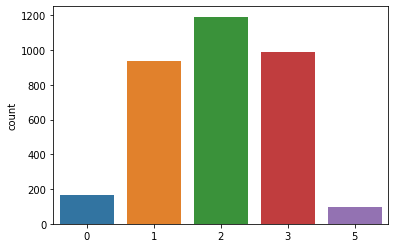

In [44]:
sns.countplot(pp)

### we can see the perfect gaussian distribution of the predicted values

In [45]:
#Decision Tree Classifier

In [46]:
tr= DecisionTreeClassifier()

In [47]:
tr.fit(x_train,y_train)

DecisionTreeClassifier()

In [48]:
pt=tr.predict(x_test)
pt

array([1, 2, 1, ..., 3, 2, 1])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


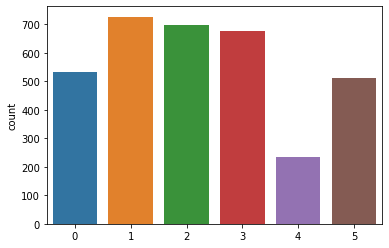

In [49]:
sns.countplot(pt)

In [50]:
#xgboost

In [51]:
xgb=xgboost.XGBClassifier()
xgb.fit(x_train,y_train)

XGBClassifier(objective='multi:softprob')

In [52]:
px=xgb.predict(x_test)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


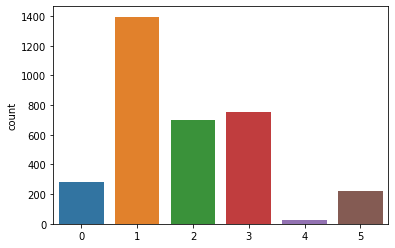

In [53]:
sns.countplot(px)